In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

In [3]:
data = pd.read_csv("gene_data_PDWD_deID.csv", header = 0, index_col = 0)
data = data.T
X = np.log(data+1)
X


Name,CALML3,PIK3R2,IL11RA,BAMBI,PLA2G10,ETV1,POLD4,NFKBIZ,SMAD2,IFNG,...,VPS33B,MRPS5,NUBP1,CNOT4,COG7,CC2D1B,GPATCH3,ZNF143,EDC3,TTC31
WD_0001,2.890372,6.643790,5.332719,5.010635,2.708050,3.295837,6.527958,6.837333,7.149917,1.945910,...,5.736572,6.563856,4.290459,6.214608,6.324359,3.828641,3.663562,4.736198,6.565265,5.758902
WD_0002,2.302585,6.643790,5.476464,5.351858,5.963579,3.871201,6.979145,6.442540,6.638568,2.639057,...,5.147494,5.998937,3.988984,5.746203,6.222576,3.806662,4.262680,4.521789,6.066108,5.365976
WD_0003,2.079442,6.626718,4.615121,4.882802,2.197225,6.003887,6.180017,5.117994,6.894670,2.197225,...,5.549076,6.562444,4.454347,6.089045,6.318968,3.610918,3.258097,4.727388,6.466145,5.220356
WD_0004,2.564949,6.994850,5.811141,4.143135,6.232448,4.369448,6.899723,6.947937,6.917706,2.397895,...,5.411646,6.551080,4.624973,6.295266,6.752270,4.174387,4.369448,5.036953,6.556778,5.808142
WD_0005,2.639057,6.131226,5.572154,5.976351,3.663562,4.682131,6.643790,6.152733,6.720220,2.484907,...,5.129899,6.751101,4.430817,6.368187,6.040255,3.610918,3.688879,4.753590,5.736572,5.902633
WD_0006,3.367296,6.865891,5.517453,6.016157,6.548219,3.806662,7.265430,6.688355,6.846943,2.639057,...,5.564520,6.533789,4.615121,6.175867,6.687109,4.043051,4.382027,5.068904,6.445720,5.733341
WD_0007,2.397895,6.313548,5.476464,5.924256,3.951244,4.962845,6.122493,4.564348,7.186901,2.079442,...,5.298317,6.431331,4.406719,6.393591,6.373320,3.367296,3.583519,5.003946,6.289716,5.828946
WD_0008,2.484907,5.828946,4.521789,3.526361,4.060443,2.484907,5.780744,5.634790,5.720312,1.791759,...,3.737670,4.532599,1.945910,4.025352,4.465908,3.091042,3.044522,3.178054,4.905275,4.189655
WD_0009,2.197225,6.575076,5.283204,5.129899,5.365976,4.094345,6.935370,6.642487,6.690842,1.791759,...,5.075174,6.008813,4.317488,5.894403,6.109248,3.713572,3.784190,4.634729,5.945421,5.451038
WD_0010,2.397895,6.478510,5.323010,4.290459,6.517671,3.496508,6.700731,6.603944,6.498282,2.079442,...,5.214936,6.335054,4.779123,6.242223,6.408529,4.060443,4.143135,4.997212,6.295266,5.564520


In [7]:
y = np.array( [ 0 if d.split('_')[0] == 'WD' else 1 for d in data.index ] )
y 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=13)
# X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=7)

X_train

Name,CALML3,PIK3R2,IL11RA,BAMBI,PLA2G10,ETV1,POLD4,NFKBIZ,SMAD2,IFNG,...,VPS33B,MRPS5,NUBP1,CNOT4,COG7,CC2D1B,GPATCH3,ZNF143,EDC3,TTC31
PD_0002,18,759,190,507,10,375,572,415,1042,11,...,315,1427,129,759,630,27,50,202,822,423
WD_0006,28,958,248,409,697,44,1429,802,940,13,...,260,687,100,480,801,56,79,158,629,308
PD_0013,27,634,127,322,22,920,429,201,2622,20,...,247,1020,74,424,371,43,35,165,667,422
WD_0021,16,709,276,1027,5,83,930,727,594,10,...,260,887,142,489,816,31,35,190,773,317
PD_0006,7,370,86,68,148,135,845,787,681,22,...,225,660,84,400,545,25,22,143,505,260
WD_0018,16,364,154,24,88,27,569,254,486,6,...,97,286,43,178,246,20,18,54,245,154
WD_0012,9,422,109,210,346,73,1082,989,641,4,...,139,514,79,394,491,40,38,103,386,239
WD_0001,17,767,206,149,14,26,683,931,1273,6,...,309,708,72,499,557,45,38,113,709,316
WD_0013,11,289,130,644,58,950,687,613,981,20,...,163,638,101,443,507,32,25,151,410,256
PD_0001,51,28,57,35,11,34,55,46,83,21,...,22,58,11,37,43,12,4,32,46,28


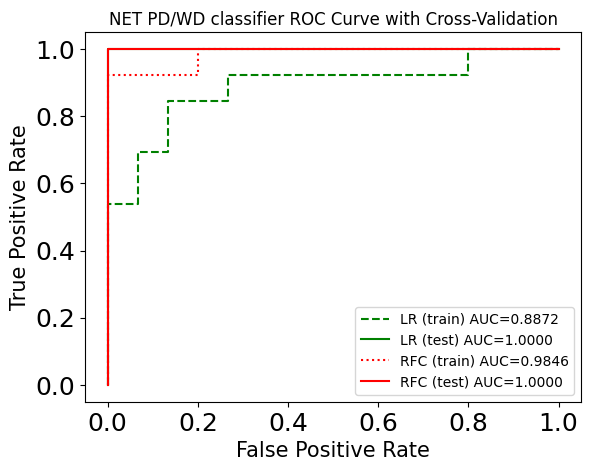

In [9]:
import sys

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import roc_curve

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

simplefilter("ignore", category=ConvergenceWarning)

logreg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter = 100)
logreg.fit(X_train, y_train)
filename = 'suppl_notebook1_logreg.sav'
pickle.dump(logreg, open(filename, 'wb'))

y_probs = cross_val_predict(logreg, X_train, y_train, method='predict_proba', cv=5 )
y_probs = y_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_probs)

# Plot the ROC curve for the training data as a dotted line
plt.plot(fpr, tpr, label='LR (train) AUC={:.4f}'.format(metrics.auc(fpr, tpr)), color='green', linestyle='dashed')
y_probs = logreg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:,1])
plt.plot(fpr, tpr, label='LR (test) AUC={:.4f}'.format(metrics.auc(fpr, tpr)), color='green', linestyle='solid')

##### RFC

rfc =  RandomForestClassifier(n_estimators=100, random_state = 2)
rfc.fit(X_train, y_train)
filename = 'suppl_notebook1_rfc.sav'
pickle.dump(rfc, open(filename, 'wb'))

y_probs = cross_val_predict(rfc, X_train, y_train, method='predict_proba', cv=5)
y_probs = y_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_probs)

# Plot the ROC curve for the training data as a dotted line
plt.plot(fpr, tpr, label='RFC (train) AUC={:.4f}'.format(metrics.auc(fpr, tpr)), color='red', linestyle='dotted')
y_probs = rfc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:,1])
plt.plot(fpr, tpr, label='RFC (test) AUC={:.4f}'.format(metrics.auc(fpr, tpr)), color='red', linestyle='solid')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('NET PD/WD classifier ROC Curve with Cross-Validation')
plt.legend()

plt.savefig("roc_curve_lr_rfc.png")
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7310e912-e0e1-4816-bf70-77f205fc24c2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>